In [5]:
import os
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# set directories
root            = '/home/amber/OneDrive/code/prednet_Brands2024_git/'

root_data       = '/home/amber/Documents/prednet_Brands2024/data/model/Lotter2017/'
root_stim       = '/home/amber/Documents/prednet_Brands2024/data/stimuli/128_160/'

# dataset
dataset_stim = 'set1'

# select model
model = 'Lotter2017'

# set training data
dataset = 'KITTI'

# define trial
trial = 'onepulse'

# output mode
output_mode         = 'E'
# output_mode         = 'error'
# output_mode         = 'R'
# output_mode         = 'A'
# output_mode         = 'Ahat'

# number of layers
n_layer = 4

# create stimulus for onepulse trials
nt          = 45
tempCond    = [1, 2, 4, 8, 16, 32]

# set labels
labels = ['Ground truth', 'Prediction', 'E1', 'E2', 'E3', 'E4']

# color
color_layer         = ['#69B190', '#549EB3', '#4E79C5', '#6F4C9B']

# set image index
img_idx = 22

# define size
shape1 = [3, 128, 160]
shape2 = [48, 64, 80]
shape3 = [96, 32, 40]
shape4 = [192, 16, 20]


In [6]:
# initiate dataframe
X_img   = np.zeros((nt, shape1[0], shape1[1], shape1[2]))
X_pred1 = np.zeros((nt, shape1[0], shape1[1], shape1[2]))
X_pred2 = np.zeros((nt, shape2[0], shape2[1], shape2[2]))
X_pred3 = np.zeros((nt, shape3[0], shape3[1], shape3[2]))
X_pred4 = np.zeros((nt, shape4[0], shape4[1], shape4[2]))

In [7]:
# retrieve images
temp = np.load(root_stim + dataset_stim + '/stimuli_' + trial + '.npy')
X_img[:, :, :, :] = temp[-1, img_idx, :, :, :]

: 

In [8]:
# retrieve trained predictions
temp = np.load(root_data + dataset_stim + '/feature_maps/prednet_' + trial + '_' + output_mode + str(1) + '_actvs_' + dataset + '.npy')
X_pred1[:, :, :, :] = temp[-1, img_idx, :, :int(shape1[0]), :, :]

temp = np.load(root_data + dataset_stim + '/feature_maps/prednet_' + trial + '_' + output_mode + str(2) + '_actvs_' + dataset + '.npy')
X_pred2[:, :, :, :] = temp[-1, img_idx, :, :int(shape2[0]), :, :]

temp = np.load(root_data + dataset_stim + '/feature_maps/prednet_' + trial + '_' + output_mode + str(3) + '_actvs_' + dataset + '.npy')
X_pred3[:, :, :, :] = temp[-1, img_idx, :, :int(shape3[0]), :, :]

temp = np.load(root_data + dataset_stim +  '/feature_maps/prednet_' + trial + '_' + output_mode + str(4) + '_actvs_' + dataset + '.npy')
X_pred4[:, :, :, :] = temp[-1, img_idx, :, :int(shape4[0]), :, :]

In [ ]:
# load prediction
prediction = np.load(root_data + dataset_stim + '/feature_maps/prednet_' + trial + '_prediction_actvs_' + dataset + '.npy')
prediction.shape

(6, 24, 45, 3, 128, 160)

In [ ]:
# X = [X_img, X_pred1/np.max(X_pred1), X_pred2/np.max(X_pred2), X_pred3/np.max(X_pred3), X_pred4/np.max(X_pred4)]
X = [X_img, prediction, X_pred1, X_pred2, X_pred3, X_pred4]

In [ ]:
print(X_pred1.shape)

(45, 3, 128, 160)


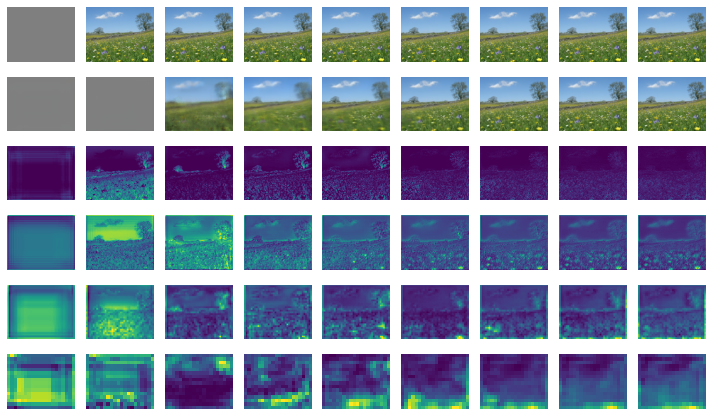

In [ ]:
current_nt  = 9
start       = 3

# initiate figure
fig, axs = plt.subplots(6, current_nt, figsize=(10, 6), facecolor='white')

# visualize
for t in range(current_nt):
    for ilbl, lbl in enumerate(labels):

        # plot
        if ilbl == 0:
            axs[ilbl, t].imshow(np.transpose(X[ilbl][start+t, :, :, :], (1, 2, 0)))
        elif ilbl == 1:
            axs[ilbl, t].imshow(np.transpose(X[ilbl][-1, img_idx, start+t, :, :, :], (1, 2, 0)))
        else:

            # normalize response
            data_current = X[ilbl][start+t, :, :, :].mean(0)/np.max(X[ilbl].mean(1))

            # visualize
            axs[ilbl, t].imshow(data_current)

        # adjust axes
        axs[ilbl, t].spines['top'].set_visible(False)
        axs[ilbl, t].spines['bottom'].set_visible(False)
        axs[ilbl, t].spines['left'].set_visible(False)
        axs[ilbl, t].spines['right'].set_visible(False)
        axs[ilbl, t].set_xticks([])
        axs[ilbl, t].set_yticks([])

# save
plt.tight_layout()
plt.savefig(root + 'visualization/Fig3A', dpi=600, bbox_inches='tight')
plt.savefig(root + 'visualization/Fig3A.svg', bbox_inches='tight')


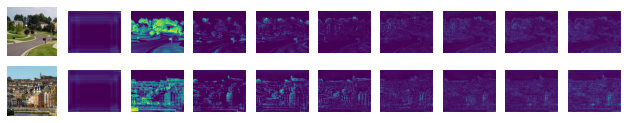

In [ ]:
# select stimuli
dataset_idx_E1         = [1, 1]
img_idx_E1             = [16, 11]

# datasets
datasets_stimuli = ['set1', 'set2']

# visualize
current_nt  = 9
start       = 3

# initialize array
X_pred1_L1 = np.zeros((nt, shape1[0], shape1[1], shape1[2]))
# print(X_pred1.shape)

# initiate figure
fig, axs = plt.subplots(len(img_idx_E1), current_nt+1, figsize=(11, len(img_idx_E1)), facecolor='white')

# store activations
actvs = np.zeros((len(img_idx_E1), current_nt))

# plot
for i in range(len(img_idx_E1)):

    # retrieve images
    X_img_L1 = Image.open(root_stim + datasets_stimuli[dataset_idx_E1[i]-1] + '/img' + str(96+img_idx_E1[i]) + '.jpg')

    # retrieve trained predictions
    temp = np.load(root_data + datasets_stimuli[dataset_idx_E1[i]-1] + '/feature_maps/prednet_' + trial + '_' + output_mode + str(1) + '_actvs_KITTI.npy')
    X_pred1_L1[:, :, :, :] = temp[-1, img_idx_E1[i]-1, :, :int(shape1[0]), :, :]

    # plot image
    axs[i, 0].imshow(X_img_L1)

    # visualize
    for t in range(current_nt):

        # visualize
        axs[i, t+1].imshow(X_pred1_L1[start+t, :, :, :].mean(0))

        # save activations
        actvs[i, t] = np.mean(X_pred1_L1[start+t, :, :, :])

        # adjust axes
        axs[i, t+1].spines['top'].set_visible(False)
        axs[i, t+1].spines['bottom'].set_visible(False)
        axs[i, t+1].spines['left'].set_visible(False)
        axs[i, t+1].spines['right'].set_visible(False)
        axs[i, t+1].set_xticks([])
        axs[i, t+1].set_yticks([])

    # save
    axs[i, 0].axis('off')

# save
plt.savefig(root + 'visualization/Fig3B', dpi=600, bbox_inches='tight')
plt.savefig(root + 'visualization/Fig3B.svg', bbox_inches='tight')


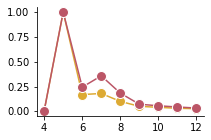

In [ ]:
fig = plt.figure(figsize=(3, 2), facecolor='white')
ax = plt.gca()

# color code
color = ['#DDAA33', '#BB5566']

# plot
for i in range(len(img_idx_E1)):

    ax.plot(np.arange(current_nt)+start+1, actvs[i, :]/np.max(actvs[i, :]), color=color[i], marker='o', markersize=10, markeredgecolor='white')

# adjust axes
ax.tick_params(axis='both')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# save
plt.savefig(root + 'visualization/Fig3C', dpi=600, bbox_inches='tight')
plt.savefig(root + 'visualization/Fig3C.svg', bbox_inches='tight')